In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv("train.csv")
test= pd.read_csv("test.csv")

In [3]:
train.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [4]:
test.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

In [5]:
train.shape

(31647, 18)

In [6]:
test.shape

(13564, 17)

In [7]:
train.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

In [8]:
train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


## Univariate Analysis

In [9]:
train['subscribed'].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

<AxesSubplot:>

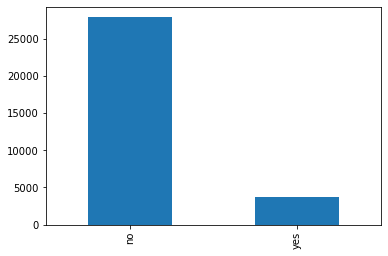

In [10]:
train['subscribed'].value_counts().plot.bar()

<AxesSubplot:>

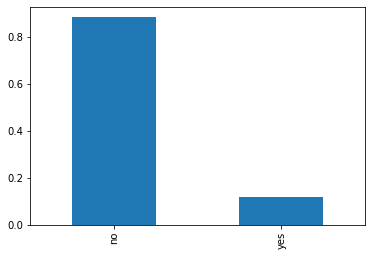

In [11]:
train['subscribed'].value_counts(normalize=True).plot.bar()

<AxesSubplot:ylabel='Frequency'>

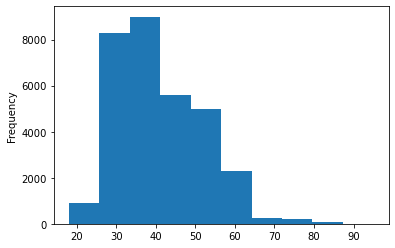

In [12]:
train['age'].plot.hist()

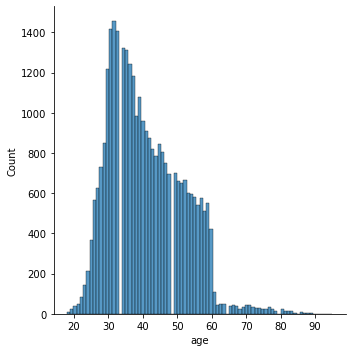

In [13]:
sns.displot(train['age'])

<AxesSubplot:>

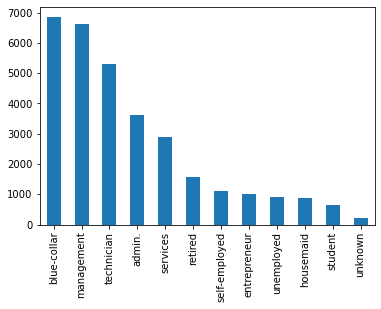

In [14]:
train['job'].value_counts().plot.bar()

<AxesSubplot:>

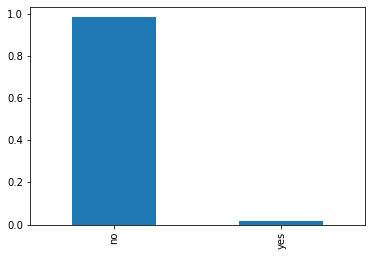

In [15]:
train['default'].value_counts(normalize=True).plot.bar()

<AxesSubplot:>

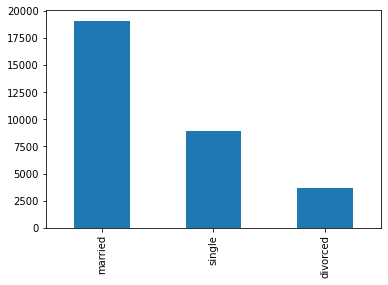

In [16]:
train['marital'].value_counts().plot.bar()

## Bivariate Analysis

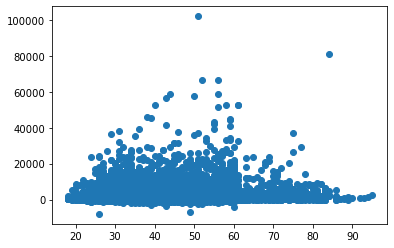

In [17]:
plt.scatter(train['age'],train['balance'])

In [18]:

train['age'].corr(train['balance'])

0.10324487428906831

In [19]:
train.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

<AxesSubplot:xlabel='subscribed'>

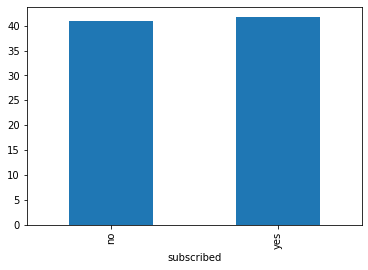

In [20]:
train.groupby('subscribed')['age'].mean().plot.bar()

In [21]:
from scipy.stats import ttest_ind

In [22]:
yes = train[train['subscribed']=='yes']

In [23]:
nos = train[train['subscribed']=='no']

In [24]:
ttest_ind(yes['age'],nos['age'],nan_policy='omit')

Ttest_indResult(statistic=4.366415946925224, pvalue=1.267023832194675e-05)

subscribed       no  yes
job                     
admin.         3179  452
blue-collar    6353  489
entrepreneur    923   85
housemaid       795   79
management     5716  923
retired        1212  362
self-employed   983  140
services       2649  254
student         453  182
technician     4713  594
unemployed      776  129
unknown         180   26


Text(0, 0.5, 'percentage')

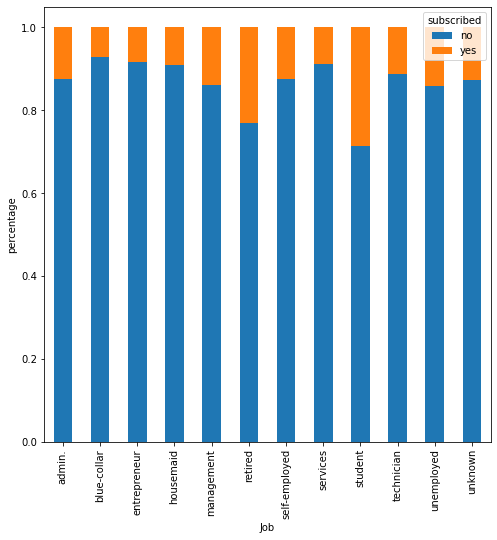

In [25]:
print(pd.crosstab(train['job'],train['subscribed']))
job = pd.crosstab(train['job'],train['subscribed'])
job.div(job.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('Job')
plt.ylabel('percentage')

subscribed     no   yes
default                
no          27388  3674
yes           544    41


Text(0, 0.5, 'Percentage')

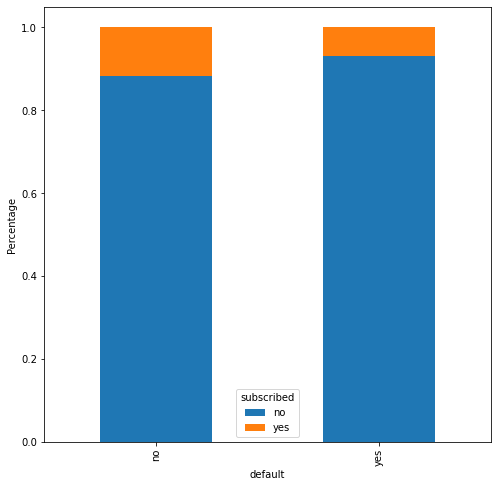

In [26]:
print(pd.crosstab(train['default'],train['subscribed']))
default=pd.crosstab(train['default'],train['subscribed'])
default.div(default.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('default')
plt.ylabel('Percentage')

In [27]:
train['subscribed'].replace('no',0,inplace=True)
train['subscribed'].replace('yes',1,inplace=True)

In [28]:
train.corr()

,ID,age,balance,day,duration,campaign,pdays,previous,subscribed
ID,1.000000,0.013337,0.067897,-0.063399,0.007183,-0.103508,0.436148,0.254476,0.296663
age,0.013337,1.000000,0.103245,-0.011056,-0.003870,0.005733,-0.021947,0.005761,0.024538
balance,0.067897,0.103245,1.000000,0.003461,0.024274,-0.012032,0.001789,0.013843,0.050807
day,-0.063399,-0.011056,0.003461,1.000000,-0.032288,0.159168,-0.087626,-0.048752,-0.029600
duration,0.007183,-0.003870,0.024274,-0.032288,1.000000,-0.080305,0.000529,0.001783,0.389838
campaign,-0.103508,0.005733,-0.012032,0.159168,-0.080305,1.000000,-0.087570,-0.033151,-0.070607
pdays,0.436148,-0.021947,0.001789,-0.087626,0.000529,-0.087570,1.000000,0.428938,0.108290
previous,0.254476,0.005761,0.013843,-0.048752,0.001783,-0.033151,0.428938,1.000000,0.088081
subscribed,0.296663,0.024538,0.050807,-0.029600,0.389838,-0.070607,0.108290,0.088081,1.000000


## Data cleaning

In [29]:
train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

## Model Building

In [30]:
y = train['subscribed']
x = train.drop('subscribed',1)

In [31]:
x = pd.get_dummies(x)

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x_train,x_target,y_train,y_target = train_test_split(x,y,random_state=14,stratify=y,test_size=0.2)

## Logistic Regresson

In [34]:
from sklearn.linear_model import LogisticRegression
lreg = LogisticRegression()

In [35]:
lreg.fit(x_train,y_train)

LogisticRegression()

In [36]:
pred = lreg.predict(x_target)

In [37]:
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [38]:
lreg.score(x_target,y_target)

0.8930489731437599

## Decision Tree

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
clf = DecisionTreeClassifier()

In [41]:
model = clf.fit(x_train,y_train)

In [42]:
clf.score(x_train,y_train)

1.0

In [43]:
clf.score(x_target,y_target)

0.8849921011058451

In [44]:
test = pd.get_dummies(test)

In [45]:
test_prediction = clf.predict(test)

In [46]:
submission = pd.DataFrame()


In [47]:
submission['ID'] = test['ID']
submission['subscribed'] = test_prediction

In [48]:
submission['subscribed'].replace(0,'no',inplace=True)
submission['subscribed'].replace(1,'yes',inplace=True)

In [49]:
submission.to_csv('submission.csv',header=True,index=False)